# Importing Importance libraries

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact


# Loading dataset

In [2]:

# importing dataset and converting data into pandas dataframe
df = pd.read_csv("../data/clean_Aqi_dataset.csv")
df.head(3)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
0,78.2,90.85,1.37,40.01,36.37,19.52,1.00,122.07,37.71,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,78.2,90.85,1.37,27.75,19.73,19.52,0.02,85.90,37.71,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,78.2,90.85,1.37,19.32,11.08,19.52,0.08,52.83,37.71,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# To see all columns

In [3]:
pd.set_option('display.max_columns', 42)
df.head(3)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,Ahmedabad,Aizawl,Amaravati,Amritsar,Bengaluru,Bhopal,Brajrajnagar,Chandigarh,Chennai,Coimbatore,Delhi,Ernakulam,Gurugram,Guwahati,Hyderabad,Jaipur,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
0,78.2,90.85,1.37,40.01,36.37,19.52,1.00,122.07,37.71,0.0,0.0,0.0,267.0,Moderate,2015,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,78.2,90.85,1.37,27.75,19.73,19.52,0.02,85.90,37.71,0.0,0.0,0.0,267.0,Moderate,2015,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,78.2,90.85,1.37,19.32,11.08,19.52,0.08,52.83,37.71,0.0,0.0,0.0,267.0,Moderate,2015,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(668791, 42)

# Outlier Detection
Boxplots are the best way to detect outliers in a numerical variable<br>
Question: Are there any oultier in numerical variable?<br>
Approach: Visualizing the outlier uisng boxplot().<br>
-- boxplot() to visualize distribution og specific nunmerical variable.

## PM2.5

<Axes: ylabel='PM2.5'>

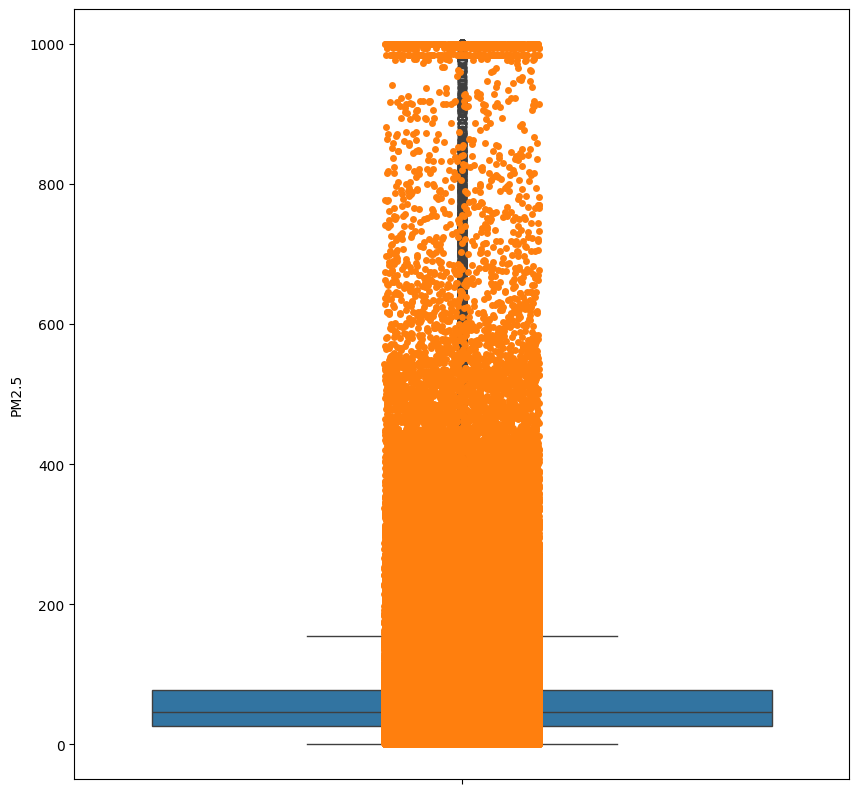

In [5]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df["PM2.5"])
sns.stripplot(data=df["PM2.5"])

### From above observation
* some outlier has been seen in PM2.5 data

## PM10

<Axes: ylabel='PM10'>

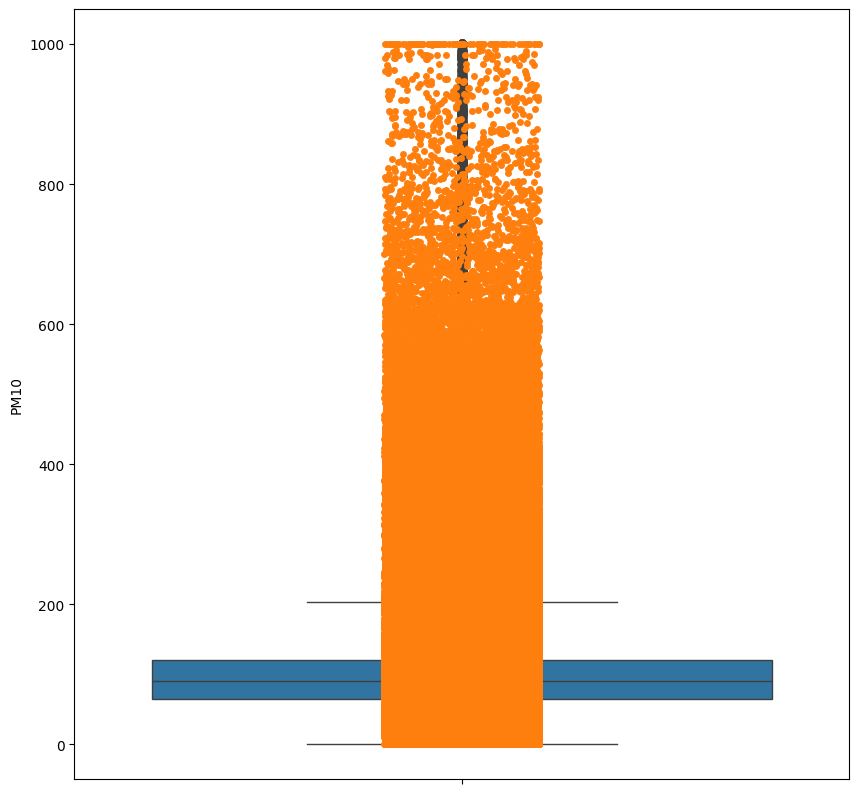

In [6]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df["PM10"])
sns.stripplot(data=df["PM10"])

### From above observation
* some outlier has been seen in PM10 data

## Here is the all numerical features box distribution plot to detected outlier

In [7]:
numerical_features = ['PM2.5',    'PM10',      'NO',     'NO2',     'NOx',     'NH3',
            'CO',     'SO2',      'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
@interact(predictor=numerical_features)
def interactive_bivariate_barplot(predictor):
    plt.figure(figsize=(10,10))
    sns.boxplot(x=predictor, data=df, color="purple")
    plt.show()

interactive(children=(Dropdown(description='predictor', options=('PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', '…

### Here is the boxplot distribution of numerical features

# Removing outlier 
Question: How to remove outlier that present in the dataset?<br>
Approach: Remove outlier using the Interquartile Range approach.<br>
-- In descriptive statistics, the interquartile range is a measure of statistical dispersion, which is the spread of the data. It is defined as the difference between the 75th and 25th percentiles of the data.

In [8]:
def get_iqr(features):
    # calculating q1
    q1 = np.percentile(features, 25)

    # calculating q3
    q3 = np.percentile(features, 75 )

    # caluculating IQR value
    iqr_value = q3 - q1

    # calculating the lower and upper fence
    lower_fence = q1 - 1.5 * iqr_value
    upper_fence = q3 + 1.5 * iqr_value

    # returning the lower and upper fence
    return lower_fence, upper_fence

In [9]:
def remove_outlier(data, features):
    r_o = data.copy()
    r_o.drop(columns="AQI_Bucket", inplace=True)
    for index in range(len(features)):
        for item in features:
            lower, upper = get_iqr(r_o[item])
            r_o = r_o.loc[(r_o[item] > lower) | (r_o[item] < upper)]
    return r_o

In [10]:
df.columns.unique()

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year', 'Month',
       'Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal',
       'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi',
       'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur',
       'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna',
       'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam'],
      dtype='object')

In [12]:
def replace_outliers(data, features):
    
    # Iterate over each feature
    for feature in features:
        # Calculate the lower and upper bounds of the interquartile range (IQR)
        lower, upper = get_iqr(data[feature])
        # Define the condition for outliers
        outlier_condition = (data[feature] < lower) | (data[feature] > upper)
        # Replace outliers with the median value of the feature
        data.loc[outlier_condition, feature] = data[feature].median()
    
    return data


In [13]:
features =['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI']
data_without_outlier =  replace_outliers(df, features)

In [14]:
@interact(predictor=numerical_features)
def interactive_bivariate_barplot(predictor):
    plt.figure(figsize=(10,10))
    sns.boxplot(x=predictor, data=data_without_outlier, color="purple")
    sns.stripplot(x=predictor,data=data_without_outlier, color="red")
    plt.show()

interactive(children=(Dropdown(description='predictor', options=('PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', '…

# To save data_without_outlier to train_data

In [15]:
data_without_outlier.to_csv("train_dataset.csv", index=False)